## Exercise 01

- Each diagonal cell should contain two overlaid histograms, one for the benign and one for the malignant class. In the histogram, variable values should be on the x axis, the frequency of observing that value in each class should be on the y axis. Use different colors to distinguish between the classes, and add a legend. Your visual design should make it easy to answer the following questions (3P for implementation, 1P for justifying choice of colors):
-  Plots below the diagonal should contain regression lines for both classes but not the individual data points. seaborn.regplot makes it easy to fit and plot a linear regression. 

In [2]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("only_5_relevant_atributes.xlsx",index_col=0)
df.head(5)

,thickness,uniCelS,uniCelShape,bareNuc,blaChroma,class
0,5,1,1,1,3,2
1,5,4,4,10,3,2
2,3,1,1,2,3,2
3,6,8,8,4,3,2
4,4,1,1,1,3,2


c) Plots above the diagonal should visualizes the values of the corresponding pair of variables. Use
different colors and opacities so that it is simple to relate these scatter plots to the density plots
on the diagonal. Write a custom plotting function to produce a scatter plot where the marker size
reflects the number of overlapping points. (5P)

Num Entries:  699
Uniques:  [2 4]


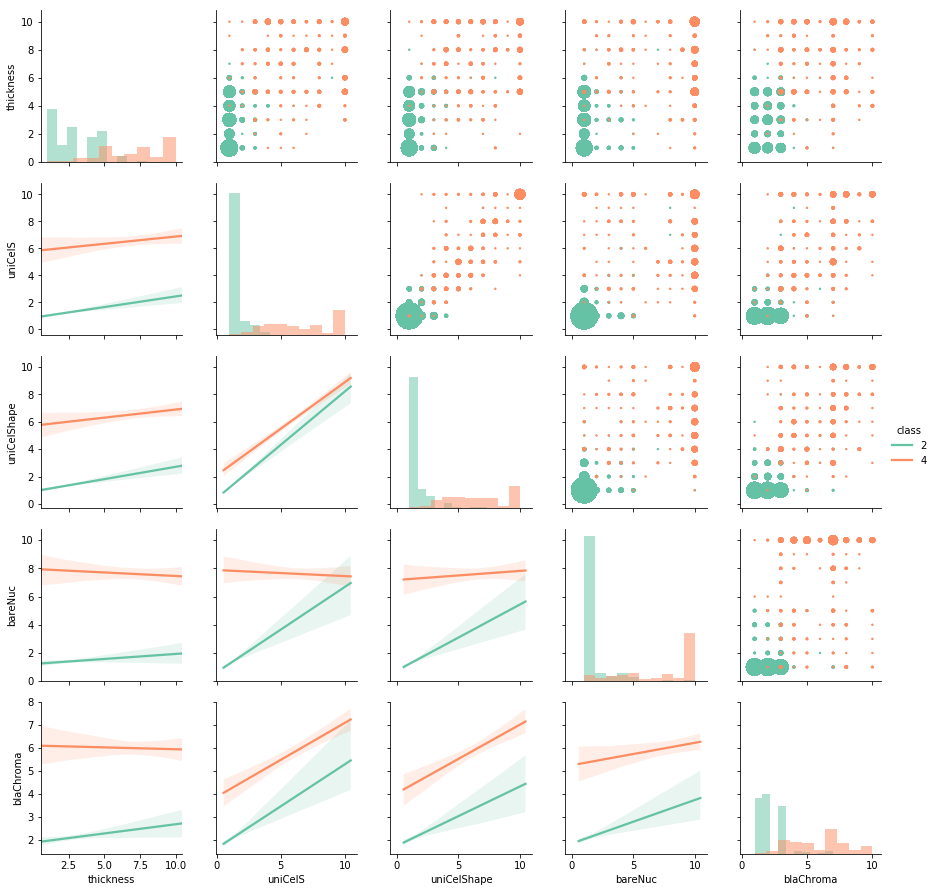

In [3]:
print('Num Entries: ', len(df))
print('Uniques: ', df['class'].unique())
relevant_vars = ["thickness","uniCelS","uniCelShape","bareNuc","blaChroma"]

def own_scatter(x_s, y_s, color=None, label=None, marker=None, **kwargs):
    #print('Writing label', label)
    #print(f'Min/Max: {x_s.min()}/{x_s.max()}, Len data: {len(x_s.tolist())}/{len(y_s.tolist())}')
    density_matrix = np.zeros((11, 11))
    density = []
    for i in x_s.index:
        x, y = x_s[i], y_s[i]
        density_matrix[x,y] += 2
    for i in x_s.index:
        x, y = x_s[i], y_s[i]
        density.append(density_matrix[x,y])
    plt.scatter(x_s.tolist(), y_s.tolist(), s=density, color=color)
        
    
    
g = sns.PairGrid(df, hue='class', vars=relevant_vars, palette="Set2", hue_kws={"marker": ["o", "s"]})
g = g.map_diag(plt.hist, alpha=0.5)
g = g.map_lower(sns.regplot,scatter=False, fit_reg=True)
g = g.map_upper(own_scatter)
g = g.add_legend()

### Subtask a
- For which variable(s) can you find a range of values for which the class of the sample is
certain? Write down the ranges. (2P)
- Which variable(s) has(have) almost a uniform distribution for the malignant samples? (2P)
    - thickness: 0 - 2.5 benign, >7.5 malignat
    - uniCelS: >4 maligant
    - uniCelShape: <2 benign, >5 maligant
    - blaChroma: >7, maligant
    - Almost uniform for variables: uniCelShape, uniCelS, thickness

### Subtask c
- Point out a pair of variables whose values have a positive correlation overall. (1P)
- Can you identify a pair of variables for which the values are highly correlated in one groupof subjects (e.g. malignant), but less so in the other group? (1P)
    - uniCelS and blaChroma have a positive Correlation overall
    - uniCelS and bareNuc is strongly correlated for benign samples, but not for malignant ones

### Subtask e
- Imagine that, given only the values of two variables, you will be asked to decide whether they are from a benign sample, or a malignant one. Which pair of variables would you choose to make that decision? Why? (
    - uniCelS and bareNuc is a good pair because you have only a clear correlation for benign samples, so high values are a good indicator for the benign class

### Subtask d
- Compute the distance consistency of all scatter plots. Which pair of variables leads to the highest distance consistency?

In [4]:
# Distance consistency

def calc_dcs(df, col1, col2):    
    benign_class = df.loc[df.loc[:,"class"] == 2, [col1, col2]]
    malignant_class = df.loc[df.loc[:,"class"] == 4, [col1, col2]]
    benign_mean = benign_class.mean()
    malignant_mean = malignant_class.mean()

    benign_minus_mean = (benign_class - benign_mean).abs()
    malignant_minus_mean = (malignant_class - malignant_mean).abs()
    benign_minus_malignant_mean = (benign_class - malignant_mean).abs()
    malignant_minus_benign_mean = (malignant_class - benign_mean).abs()
    
    counter = 0
    for index, row in benign_class.iterrows():
        dist1 = np.sqrt((benign_mean[col1] - row[col1])**2 + (benign_mean[col2] - row[col2])**2)
        dist2 = np.sqrt((malignant_mean[col1] - row[col1])**2 + (malignant_mean[col2] - row[col2])**2)
        if dist1 < dist2:
            counter +=1
    
    for index, row in malignant_class.iterrows():
        dist1 = np.sqrt((malignant_mean[col1] - row[col1])**2 + (malignant_mean[col2] - row[col2])**2)
        dist2 = np.sqrt((benign_mean[col1] - row[col1])**2 + (benign_mean[col2] - row[col2])**2)
        if dist1 < dist2:
            counter +=1
            
    DCS = 100 * (counter) / (len(benign_class.index) + len(malignant_class.index))
    return DCS

highest = (0, None, None)
done = []
for var in relevant_vars:
    for var2 in relevant_vars:
        if var == var2 or var2 in done:
            continue
        DCS = calc_dcs(df, var, var2)
        if DCS > highest[0]:
            highest = (DCS, var, var2)
        print(f'Distance Consitency for {var}|{var2}: {DCS}')
    done.append(var)
print(f'Best DCS of {highest[0]} for {highest[1]}|{highest[2]}')
#benign_class[['thickness', 'uniCelS']].head()

Distance Consitency for thickness|uniCelS: 93.8483547925608
Distance Consitency for thickness|uniCelShape: 94.70672389127324
Distance Consitency for thickness|bareNuc: 93.70529327610873
Distance Consitency for thickness|blaChroma: 93.41917024320458
Distance Consitency for uniCelS|uniCelShape: 93.41917024320458
Distance Consitency for uniCelS|bareNuc: 94.27753934191702
Distance Consitency for uniCelS|blaChroma: 92.98998569384835
Distance Consitency for uniCelShape|bareNuc: 93.8483547925608
Distance Consitency for uniCelShape|blaChroma: 93.2761087267525
Distance Consitency for bareNuc|blaChroma: 92.13161659513591
Best DCS of 94.70672389127324 for thickness|uniCelShape


## Exercise 2

a) In addition to standard PCPs, the authors test eight variations. For each of them, briefly describe the proposed modification, and why the authors expected it to improve the visualization. Use 1-2 sentences for each of the eight cases.

-> 1. Beside the PCP, the authors included 2D scatter plots between each pair of adjacent PCP axes, 
        to immediatly detect clusters which might be not so directly to see in the PCP plots only.
        
-> 2./3./4. To enhance fuzzy clusters the authors tested a color- and opacity-based highlighting methods              using local neighborhood density of each data point. In one method, they enhanced density-points using  
     simple colors from a well-defined, distinguishable lookup table. In the second method, density-based 
     blending which refers the amount of polyline opacity was used only. In the third method, both color-based        and opacity-based methods were combined. 

-> 5. To bypass ambiguity caused by polyline crossing the authors introduced a curve drawing method that resolves      crossing ambiguity by only introducing curvature where needed (QUOTED) and in a unqiue designing. This makes      it easy to track lines.

-> 6./7./8. The last three methods are based on including animation (different "stages" of the plots) into the        plots. Due to the authors, this includes motion parallax which tremendously helps to visually                    distiguish overlapping, fuzzy clusters. A random tour animation scheme including random permuations of data 
     dimensions was used for the first method. Animations are virtually non-cyclic and show new patterns each.
     Secondly, a slightly cyclic animation scheme including a rotation matrix (designed to rotate data points)        was performed and called permutation tour animation scheme. In the final one - the wobble animation scheme-      PCP polylines “wobble” around a base position "in a sinusoidal way"  (QUOTED). Motion parallax was                generated, but clusters kept fixed for easy tracking. A random tour scheme function including                    parametes for amplitude and period time was build for that.
     
b) Within the user study, what task did the subjects have to perform? ...

-> Participants had to simply detect clusters on all 9 various PCPs variation. Correctness of clusters and repsonse time were measured. Of course, the experiment was caried out fully randomized with numerous trials for each variation and so on. Correlation (frequently used in practice) between different variables wasn't considered in the whole experiment. It was all about clusters.

c) To which extent did the results of the study match the authors’ hypotheses?

The authors expected the effectiveness/usability of the 9 variation including the standard PCP in the following order: ColorBlend, Color, SP, Curved, Blend, Wobble, {RT, PT}, Standard. 
Basically, color is regarded as a strong visual cue for humans according to the authors. Furthermore, all variations were expected to outperform the standard PCP though.
The outcome was still different: SP, {Standard, Color, Blend, Color- Blend, Curved, Wobble}, {RT, PT}
That SP outperforms Color and Color-blend was unexpected. SP being in the top 3 comes to the authors expections still. Furthermore, that {Standard, Color, Blend, Color- Blend, Curved, Wobble} perrformed nearly the same was also not expected, especially the Color and Color-blend variation were highly overestimated in their effectiveness.

d) Which of the explored modifications would you consider using when designing a visualization
based on parallel coordinates?

My preferation would definitely go with the study outcome of clusters identification: Scatter Plots - simply by the fact that clusters are literally shown like the users expectation of a typical cluster - areas with a high density of data points - which would therefore follow the easiest way to detect them. I would still modify this approach in terms of increasing the amount axis labels (and therefore scatter plots) without the need of sharing axis labels between the variables pairs. This would enlarge the whole figure, but would make it even more intuitive to understand relations, mainly because of no rotation needs - in my opinion.


## Task 03

In [5]:
import pandas as pd
import numpy as np
import plotly.tools
from plotly.plotly import plot, iplot
import plotly.graph_objs as go


plotly.tools.set_credentials_file(username='s6simue2', api_key='dVRUcDcyLJlP121RCDl7')

In [6]:
data = pd.read_excel("Data_Cortex_Nuclear.xls")
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [7]:
data.loc[:, "pPKCG_N"].min()

0.598766552

In [8]:
print("Num rows: ", len(data.index))

Num rows:  1080


### Subtask a
- Use pandas to read the file Data_Cortex_Nuclear.xls provided on the lecture homepage. Extract subgroups t-CS-s and c-CS-s. How many mice were measured for each class?

In [9]:
# Subtask a
rows_t_class = len(data.loc[data.loc[:,"class"] == "t-CS-s", :].MouseID.unique())
rows_c_class = len(data.loc[data.loc[:,"class"] == "c-CS-s", :].MouseID.unique())

print(f"Num rows t-CS-s: {rows_t_class}, Num rows c-CS-s: {rows_c_class}")

Num rows t-CS-s: 105, Num rows c-CS-s: 135


### Subtask b
Create a parallel coordinates plot with plotly from the following 5 proteins: (pPKCG N, pP70S6 N,
pS6 N, pGSK3B N, ARC N). Assign different colors to the two selected classes. Annotate every
axis with the correct protein name. (9P)


In [10]:
#Subtask b
relevant_names = ["pPKCG_N", "pP70S6_N", "pS6_N", "pGSK3B_N", "ARC_N", "class"]
sc_1 = data.loc[data.loc[:,"class"] == "t-CS-s", relevant_names]
sc_2 = data.loc[data.loc[:,"class"] == "c-CS-s", relevant_names]
df = pd.concat([sc_1, sc_2])

df.loc[df["class"] == "t-CS-s", "class"] = 0
df.loc[df["class"] == "c-CS-s", "class"] = 1

df[relevant_names[1]].min()

0.139845309

In [13]:
data = [
    go.Parcoords(
        line = dict(
            color = df["class"],
            cmin = 0,
            cmax = 1,
            colorscale = [[0, "#0044BB"], [1, "#00BB44"]]
        ),
        dimensions = [
            dict(
                range = [df[relevant_names[i]].min(), df[relevant_names[i]].max()], 
                label = relevant_names[i], 
                values = df[relevant_names[i]]
            ) for i in range(len(relevant_names) - 1)]
    )
]

layout = go.Layout(
    plot_bgcolor = '#FFFFFF',
    paper_bgcolor = '#FFFFFF'
)

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename = 'parcoords-basic')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~s6simue2/0 or inside your plot.ly account where it is named 'parcoords-basic'


### Subtask c
- Explore the data by interacting with the parallel coordinates plot. Do you find anything suspicious about the data set? (1P)
    - Protein measurements for pS6_N and ARC_N seem to be the same